<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [4]:
boston_df.drop('Unnamed: 0', axis=1, inplace=True)
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2

For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Distribution of Median value owner-occupied homes')

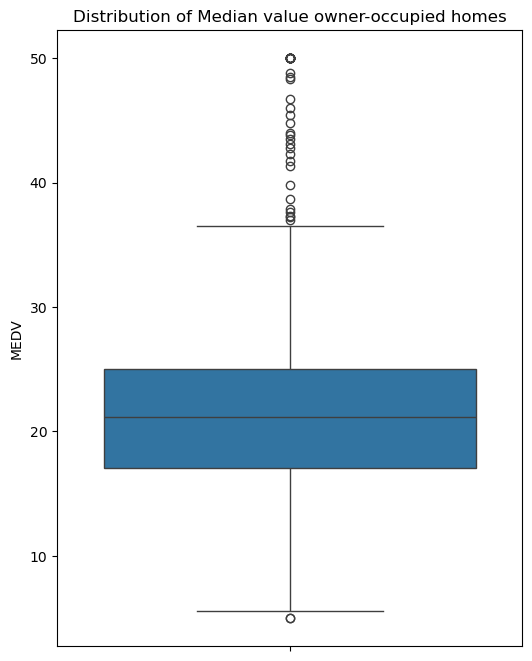

In [5]:
plt.figure(figsize=(6,8))
sns.boxplot(y='MEDV', data=boston_df)
plt.title("Distribution of Median value owner-occupied homes")

Distribution shows to be mostly normal between around 5 and 37 with a symmetric interquantile and a median around 22. However the data also shows a large amount of outliers over the max, resulting in skewness of the data.

Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles River tract bounds: yes/no')

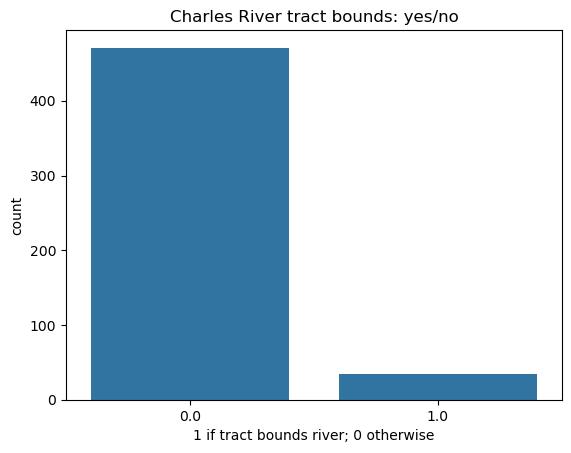

In [6]:
Charles = boston_df['CHAS'].value_counts()
sns.barplot(Charles)
plt.xlabel("1 if tract bounds river; 0 otherwise")
plt.title("Charles River tract bounds: yes/no")

The bar plot shows that a strong majority of the observations do not tract bounds.

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0, 0.5, 'Age categories')

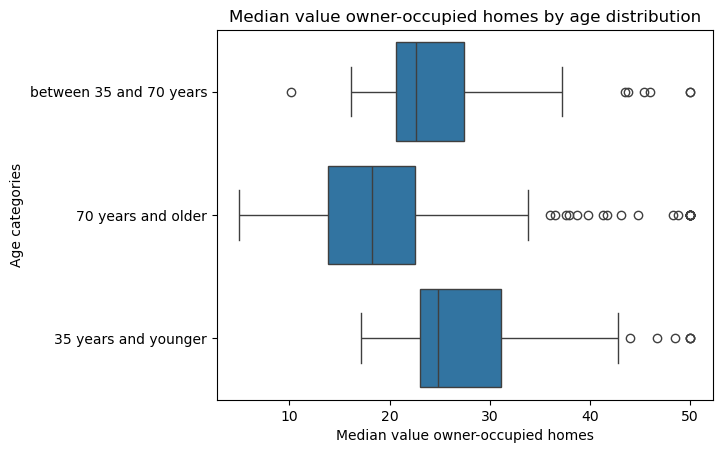

In [8]:
sns.boxplot(x='MEDV',y='age_group', data=boston_df)
plt.title("Median value owner-occupied homes by age distribution")
plt.xlabel("Median value owner-occupied homes")
plt.ylabel("Age categories")

The boxplot by age groups shows that age influences the distribution of median value owner-occupied homes

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide conc. to Non-retail business acres')

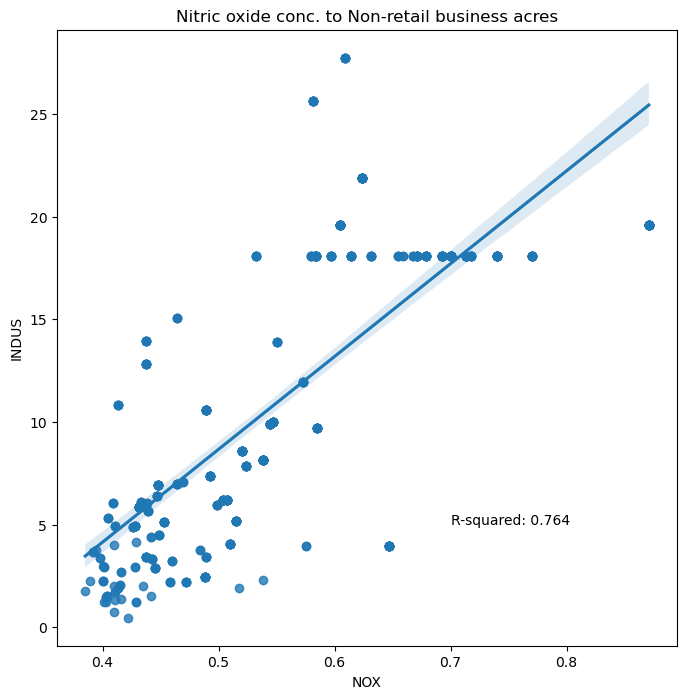

In [9]:
plt.figure(figsize=(8,8))
sns.regplot(x='NOX', y='INDUS', data=boston_df)
r,p = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
plt.annotate("R-squared: {}".format(round(r,3)), (0.7,5))
plt.title('Nitric oxide conc. to Non-retail business acres')

The scatter plot presents a large concentration of values close to the axis, but suggests a positive linear relationship. The regression line and the r-squared point to a strong linear relationship.

Create a histogram for the pupil to teacher ratio variable

Text(0.5, 0, 'Pupil to Teacher Ratio')

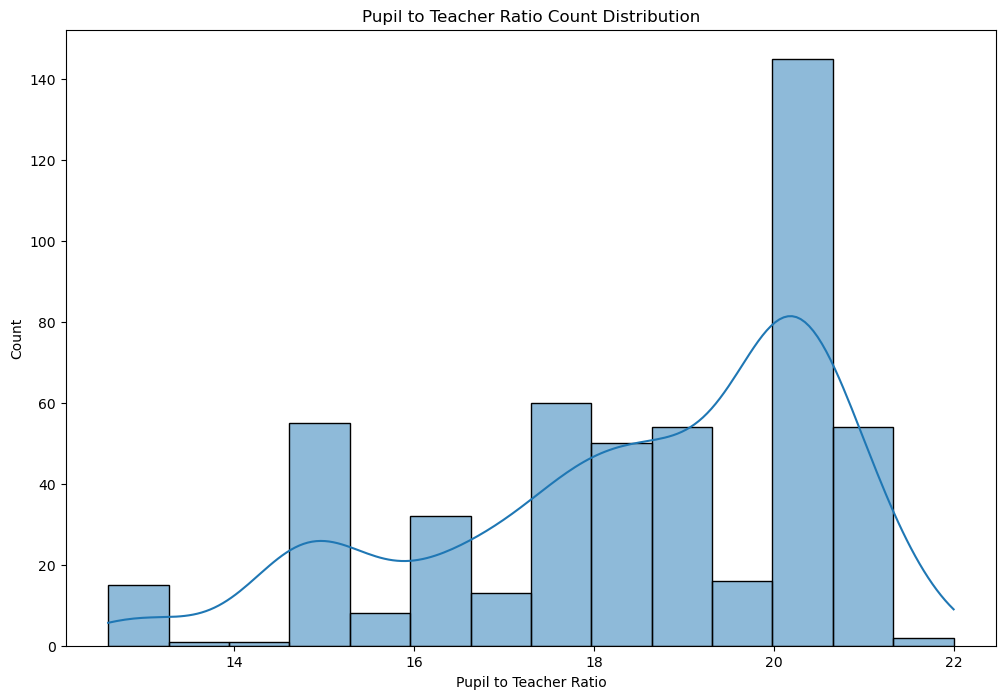

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(x='PTRATIO', data=boston_df, kde=True)
plt.title("Pupil to Teacher Ratio Count Distribution")
plt.xlabel("Pupil to Teacher Ratio")

The histogram indicate a mode in the ration at around 20. Distribution is clearly negatively skewed.

## Task 3

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Seeing that the p-value in very low and below 0.05, it is possible to reject the null hypothesis that there is no significant difference between the median value of houses bounded by the Charles river.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [12]:
age35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
age3570 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
age70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
scipy.stats.f_oneway(age35, age3570, age70)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

From the result of the p-value, it is possible to reject the null hypothesis again, stating there is indeed a difference for each proportion of owner occupied units

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [13]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

The Pearson Correlation shows an R-squared with strong positive linear correlation between the variables, while the low p-value allows us to maintain the results. The Pearson Correlation can be seen in the previously created scatter plot with regression.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [14]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        01:00:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Following the coefficient result, an additional weighted distance point equals an additional 1.09 to the median value.

In [15]:
boston_df.corr(numeric_only=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536
